In [1]:
import pandas as pd
import numpy as np
import json

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import folium

print('Done')

Done


In [2]:
url = 'https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CSD&Code1=3520005&Geo2=PR&Code2=01&SearchText=&SearchType=Begins&SearchPR=01&B1=Immigration%20and%20citizenship&TABID=1&type=0'
tables = pd.read_html(url)

In [3]:
ethnicities = tables[0]

In [4]:
ethnicities.shape

(161, 7)

In [5]:
ethnicities.drop(columns = ['Canada  [Country]'], inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [6]:
ethnicities.columns = ethnicities.columns.droplevel()
ethnicities.columns = ethnicities.columns.droplevel()
ethnicities.drop(columns = ['Male','Female'], inplace = True)
ethnicities.columns = ethnicities.columns.droplevel()

In [7]:
ethnicities.rename(columns = {'Characteristic':'Origin','Counts (unless otherwise specified)':'Count'}, inplace = True)

In [8]:
regions = ['USA','South American','Carribean','French','Italian','Other European','African','Chinese','Indian','Filipino','Japanese',
          'Other Asian', 'Middle Easters']
Immi_data = pd.DataFrame(columns = regions)

In [9]:
Immi_data.head()

,USA,South American,Carribean,French,Italian,Other European,African,Chinese,Indian,Filipino,Japanese,Other Asian,Middle Easters


In [10]:
ethnicities.drop([0], inplace = True)
ethnicities.head(40)

,Origin,Count
1,Total - Citizenship for the population in priv...,2691665
2,Canadian citizensCensus data footnote 46,2296370
3,Canadian citizens aged under 18,431655
4,Canadian citizens aged 18 and over,1864710
5,Not Canadian citizensCensus data footnote 47,395295
6,Immigrant status and period of immigration,Immigrant status and period of immigration
7,Total - Immigrant status and period of immigra...,2691665
8,Non-immigrantsCensus data footnote 49,1332090
9,ImmigrantsCensus data footnote 50,1266005
10,Before 1981,294065


In [11]:
ethnicities.drop(ethnicities.index[85:160], inplace = True)
ethnicities.drop(ethnicities.index[1:25], inplace = True)
ethnicities.reset_index(inplace = True)
ethnicities.drop(columns = ['index'], inplace = True)
ethnicities.head(20)

,Origin,Count
0,Total - Citizenship for the population in priv...,2691665
1,Total - Selected places of birth for the immig...,1266000
2,Americas,212010
3,Brazil,7025
4,Colombia,8710
5,El Salvador,6960
6,Guyana,34490
7,Haiti,1855
8,Jamaica,45075
9,Mexico,7225


In [12]:
ethnicities.drop(ethnicities.index[3:14], inplace = True)
ethnicities.reset_index(inplace = True)
ethnicities.drop(columns = ['index'], inplace = True)
ethnicities.head(40)

,Origin,Count
0,Total - Citizenship for the population in priv...,2691665
1,Total - Selected places of birth for the immig...,1266000
2,Americas,212010
3,Europe,298270
4,Bosnia and Herzegovina,5125
5,Croatia,4680
6,France,4585
7,Germany,11090
8,Greece,19235
9,Hungary,7860


In [13]:
ethnicities.shape

(50, 2)

In [14]:
ethnicities.drop(ethnicities.index[4:21], inplace = True)
ethnicities.reset_index(inplace = True)
ethnicities.drop(columns = ['index'], inplace = True)
ethnicities.head(40)

,Origin,Count
0,Total - Citizenship for the population in priv...,2691665
1,Total - Selected places of birth for the immig...,1266000
2,Americas,212010
3,Europe,298270
4,Africa,77445
5,Algeria,770
6,Egypt,6620
7,Ethiopia,9080
8,Kenya,4880
9,Morocco,1850


In [15]:
ethnicities.drop(ethnicities.index[5:14], inplace = True)
ethnicities.reset_index(inplace = True)
ethnicities.drop(columns = ['index'], inplace = True)
ethnicities.head(40)

,Origin,Count
0,Total - Citizenship for the population in priv...,2691665
1,Total - Selected places of birth for the immig...,1266000
2,Americas,212010
3,Europe,298270
4,Africa,77445
5,Asia,674495
6,Afghanistan,12740
7,Bangladesh,25100
8,ChinaCensus data footnote 59,131475
9,Hong KongCensus data footnote 60,38820


In [16]:
ethnicities.drop(ethnicities.index[6:23], inplace = True)
ethnicities.reset_index(inplace = True)
ethnicities.drop(columns = ['index'], inplace = True)
ethnicities.head(40)

,Origin,Count
0,Total - Citizenship for the population in priv...,2691665
1,Total - Selected places of birth for the immig...,1266000
2,Americas,212010
3,Europe,298270
4,Africa,77445
5,Asia,674495
6,Oceania and other places of birthCensus data f...,3785


In [17]:
Total_population = ethnicities.iloc[0,1]
Total_immigrants = ethnicities.iloc[1,1]
Non_immigrants = int(Total_population) - int(Total_immigrants)
ethnicities.drop([0,1],inplace = True)

In [18]:
NI = int(Non_immigrants) / int(Total_population)
NI

0.5296591514917347

In [19]:
print('Total population: ',Total_population)
print('Total Immigrants: ',Total_immigrants)
print('Non Immigrants: ',NI)
ethnicities.head()

Total population:  2691665
Total Immigrants:  1266000
Non Immigrants:  0.5296591514917347


,Origin,Count
2,Americas,212010
3,Europe,298270
4,Africa,77445
5,Asia,674495
6,Oceania and other places of birthCensus data f...,3785


In [20]:
immi_rest = ethnicities.astype({'Count':'int'})


In [21]:
immi_rest['Count'] = immi_rest['Count'] / int(Total_population)

In [22]:
immi_rest.loc[-1] = ['Non Immigrant', NI]  # adding a row
immi_rest.index = immi_rest.index + 1  # shifting index
immi_rest = immi_rest.sort_index()

immi_rest.head()

,Origin,Count
0,Non Immigrant,0.529659
3,Americas,0.078765
4,Europe,0.110812
5,Africa,0.028772
6,Asia,0.250587


In [23]:
!pip install lxml

In [24]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
tables = pd.read_html(url)

print('Done')

Done


In [25]:
toronto = tables[0]

In [26]:
toronto = toronto[toronto.Borough != 'Not assigned']
toronto.rename(columns={"Postal Code":"PostalCode"},inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
lonlat = pd.read_csv(r'Geospatial_Coordinates.csv')

In [28]:
lonlat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [29]:
toronto_data = toronto.merge(lonlat, left_on = 'PostalCode', right_on = 'Postal Code', left_index = False , right_index = False)

In [30]:
toronto_data.drop(columns=['Postal Code'], inplace=True)

In [31]:
toronto_data.head(20)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [32]:
client_id = 'FOA2GEH0NTDMQCEE24LJIVD3EBTTZSPXTLG5YFSCLZ05WWHP'
client_secret = 'LA5JK31YH5HQDIQLGPB5OIYE31WX2D00QVYWQASQAYPARAFF'
version = '20180605'
limit = 100
radius = 500

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
toronto_venues = getNearbyVenues(names = toronto_data['Neighborhood'],
                                         latitudes = toronto_data['Latitude'],
                                         longitudes = toronto_data['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [35]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 266 uniques categories.


In [36]:
# one hot encoding
Toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
cols = Toronto_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

#then use .reindex() function to reorder
Toronto_onehot = Toronto_onehot.reindex(columns= cols)

Toronto_onehot.head(5)

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
Toronto_rest = Toronto_onehot.filter(regex = 'Restaurant', axis = 1)

In [38]:
Toronto_rest.columns

Index(['American Restaurant', 'Asian Restaurant', 'Belgian Restaurant',
       'Brazilian Restaurant', 'Cajun / Creole Restaurant',
       'Caribbean Restaurant', 'Chinese Restaurant', 'Colombian Restaurant',
       'Comfort Food Restaurant', 'Cuban Restaurant', 'Dim Sum Restaurant',
       'Doner Restaurant', 'Eastern European Restaurant',
       'Ethiopian Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant',
       'Filipino Restaurant', 'French Restaurant', 'German Restaurant',
       'Gluten-free Restaurant', 'Greek Restaurant', 'Hakka Restaurant',
       'Indian Restaurant', 'Indonesian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Korean Restaurant', 'Latin American Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Modern European Restaurant',
       'Molecular Gastronomy Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Portuguese Restaurant', 'Ramen Restaurant',
       'Resta

In [39]:
Americas_venues = ['Brazilian Restaurant','Cajun / Creole Restaurant','Cuban Restaurant',
                   'Latin American Restaurant','Mexican Restaurant']

In [40]:
Canadian_venues = ['New American Restaurant','American Restaurant','Comfort Food Restaurant','Fast Food Restaurant','Gluten-free Restaurant',
                  'Molecular Gastronomy Restaurant',]

In [41]:
Asian_venues = ['Asian Restaurant','Chinese Restaurant','Dim Sum Restaurant','Filipino Restaurant','Indian Restaurant',
               'Indonesian Restaurant','Japanese Restaurant','Korean Restaurant','Ramen Restaurant','Sushi Restaurant',
               'Taiwanese Restaurant','Thai Restaurant','Vietnamese Restaurant','Falafel Restaurant','Hakka Restaurant','Middle Eastern Restaurant']

In [42]:
European_venues = ['Belgian Restaurant','Doner Restaurant','Eastern European Restaurant','French Restaurant','German Restaurant',
                  'Greek Restaurant','Italian Restaurant','Mediterranean Restaurant','Modern European Restaurant','Portuguese Restaurant',
                  'Turkish Restaurant']

In [43]:
African_venues = ['Ethiopian Restaurant','Moroccan Restaurant',]

In [44]:
Americas_sums = Toronto_rest[Americas_venues].sum().sum()
Asian_sums = Toronto_rest[Asian_venues].sum().sum()
European_sums = Toronto_rest[European_venues].sum().sum()
African_sums = Toronto_rest[African_venues].sum().sum()
Canadian_sums = Toronto_rest[Canadian_venues].sum().sum()
Total_venues = Americas_sums + Asian_sums + European_sums + African_sums + Canadian_sums

In [45]:
immi_rest.head()

,Origin,Count
0,Non Immigrant,0.529659
3,Americas,0.078765
4,Europe,0.110812
5,Africa,0.028772
6,Asia,0.250587


In [46]:
Venues_col = [Canadian_sums / Total_venues, Americas_sums / Total_venues, European_sums / Total_venues, African_sums / Total_venues, Asian_sums / Total_venues, 0]

In [47]:
immi_rest['Venues'] = Venues_col

In [48]:
immi_rest.sort_values(by = ['Count'], ascending = True,  inplace = True)
immi_rest.set_index('Origin', inplace = True)
immi_rest.rename(index = {'Oceania and other places of birthCensus data footnote 64':'Oceania'}, inplace=True)

In [52]:
immi_rest.head()

,Count,Venues
Origin,,
Oceania,0.001406,0.000000
Africa,0.028772,0.008427
Americas,0.078765,0.061798
Europe,0.110812,0.247191
Asia,0.250587,0.474719


In [53]:
immi_rest2

,Count,Venues
Origin,,
Oceania,0.001406,0.000000
Africa,0.028772,0.008427
Americas,0.078765,0.061798
Europe,0.110812,0.247191
Asia,0.250587,0.474719


Text(0.5, 0, '')

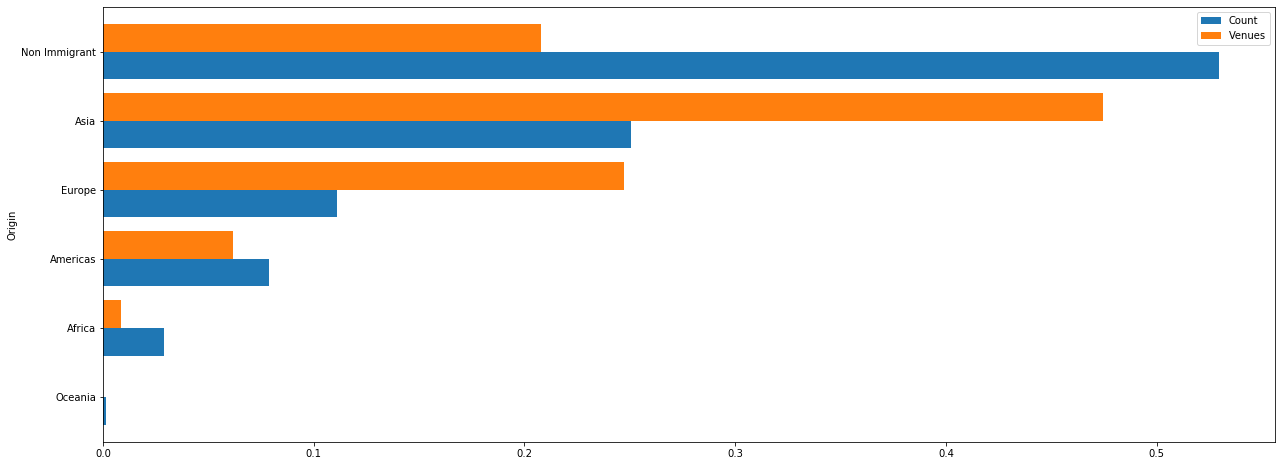

In [49]:

ax = immi_rest.plot(kind = 'barh',
                   figsize = (21,8),
                   width = 0.8)

plt.xlabel('')

In [50]:
immi_rest2 = immi_rest
immi_rest2 = immi_rest2.drop('Non Immigrant')

Text(0.5, 0, '')

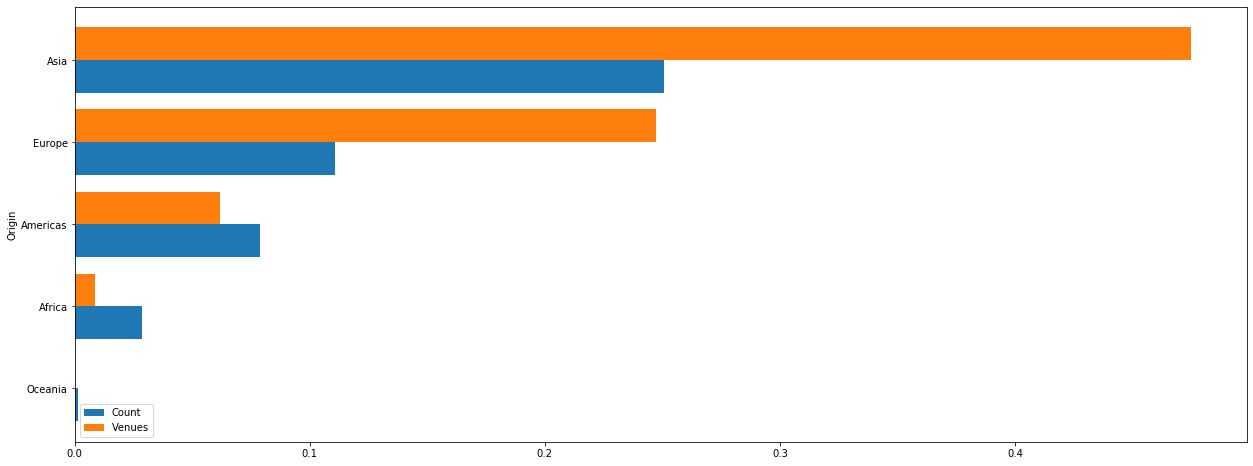

In [51]:
ax = immi_rest2.plot(kind = 'barh',
                   figsize = (21,8),
                   width = 0.8)

plt.xlabel('')